In [1]:
# Importing all libraries needed
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset. First 5 records
data = pd.read_csv('dataset.csv')
data.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4.0,No,No,No,Video game music,No,Yes,132.0,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
1,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
2,18.0,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
3,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,Rarely,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
4,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,Sometimes,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [3]:
# Statistical data of dataset
data.describe().round(2)

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,726.00,726.00,726.00,726.00,726.00,726.00,726.00
mean,25.16,3.59,122.34,5.85,4.80,3.75,2.64
std,11.93,3.04,31.65,2.79,3.02,3.09,2.85
min,10.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,2.00,104.00,4.00,2.00,1.00,0.00
50%,21.00,3.00,120.00,6.00,5.00,3.00,2.00
75%,28.00,5.00,140.00,8.00,7.00,6.00,5.00
max,89.00,24.00,220.00,10.00,10.00,10.00,10.00


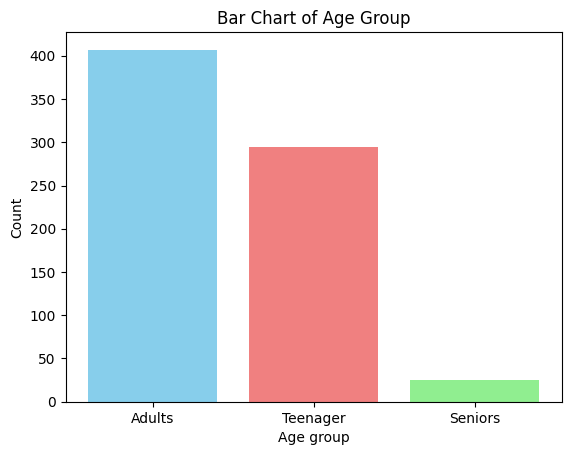

In [4]:
# Age group barchart
col = ['skyblue', 'lightcoral', 'lightgreen']
data['Age group'] = pd.cut(data['Age'], bins = [9, 19, 59, 100], labels = ['Teenager', 'Adults', 'Seniors'])
age_grp_count = data['Age group'].value_counts()
plt.bar(age_grp_count.index, age_grp_count.values, color = col)

# Adding labels and title
plt.xlabel('Age group')
plt.ylabel('Count')
plt.title('Bar Chart of Age Group')

# Show the plot
plt.show()

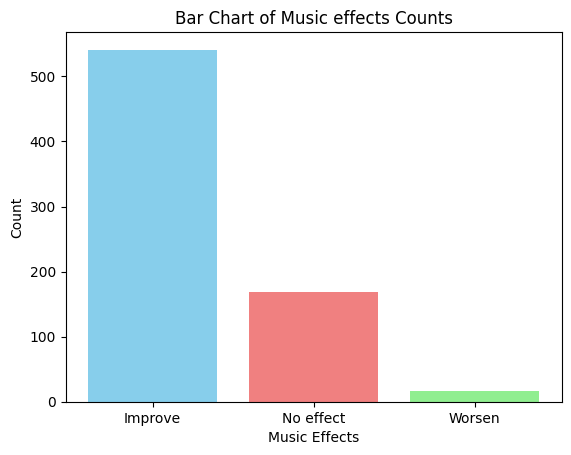

In [5]:
# Music effects barchart
col = ['skyblue', 'lightcoral', 'lightgreen']
effects_counts = data['Music effects'].value_counts()
plt.bar(effects_counts.index, effects_counts.values, color = col)

# Adding labels and title
plt.xlabel('Music Effects')
plt.ylabel('Count')
plt.title('Bar Chart of Music effects Counts')

# Show the plot
plt.show()

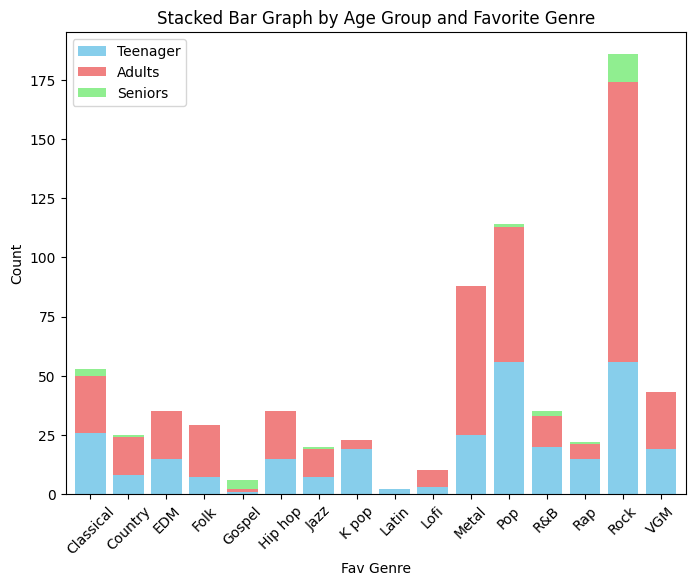

In [6]:
# Plotting a stacked Bar Graph for Age group V/S Favorite Genre
# Selecting the columns from the data for further analysis
col = ['skyblue', 'lightcoral', 'lightgreen']
data_age_genre = data[['Age group', 'Fav genre']]
grouped_data = data_age_genre.groupby(['Fav genre', 'Age group'], observed = False).size().reset_index(name = 'Count')
pivot_data = grouped_data.pivot(index = 'Fav genre', columns = 'Age group', values = 'Count').fillna(0)

# Plotting the stacked bar graph
fig, ax = plt.subplots(figsize = (8, 6))
pivot_data.plot(kind = 'bar', stacked = True, ax = ax, width = 0.8, color = col)

# Adding labels and title
plt.xlabel('Fav Genre')
plt.ylabel('Count')
plt.title('Stacked Bar Graph by Age Group and Favorite Genre')
plt.legend(loc = 'upper left')

xticks = ax.get_xticks()
labels = [label.get_text() for label in ax.get_xticklabels()]
labels = ['VGM' if label == 'Video game music' else label for label in labels]
ax.set_xticklabels(labels, rotation = 45)

# Show the plot
plt.show()

In [7]:
# Defining color palette for all graphs
col=['skyblue', 'lightcoral', 'lightgreen']
colors = { 'Teenager': 'skyblue', 'Adults': 'lightcoral', 'Seniors': 'lightgreen' }

# Selecting the columns from the data for further analysis
data_age_instrumentalist = data[['Age group', 'Instrumentalist']]
data_age_composer = data[['Age group', 'Composer']]
data_age_working = data[['Age group', 'While working']]
data_age_exploratory = data[['Age group', 'Exploratory']]
data_age_foreignlang = data[['Age group', 'Foreign languages']]

# Grouping the data, counting the number of occurrences for each group and result is stored in a new DataFrame with a 'Count' column representing the frequency of each group combination
grouped_data1 = data_age_instrumentalist.groupby(['Instrumentalist', 'Age group'], observed = False).size().reset_index(name = 'Count')
grouped_data2 = data_age_composer.groupby(['Composer', 'Age group'], observed = False).size().reset_index(name = 'Count')
grouped_data3 = data_age_working.groupby(['While working', 'Age group'], observed = False).size().reset_index(name = 'Count')
grouped_data4 = data_age_exploratory.groupby(['Exploratory', 'Age group'], observed = False).size().reset_index(name = 'Count')
grouped_data5 = data_age_foreignlang.groupby(['Foreign languages', 'Age group'], observed = False).size().reset_index(name = 'Count')

# Creating the Pivot and Plot
pivot_data1 = grouped_data1.pivot(index = 'Age group', columns = 'Instrumentalist', values = 'Count').fillna(0)
pivot_data2 = grouped_data2.pivot(index = 'Age group', columns = 'Composer', values = 'Count').fillna(0)
pivot_data3 = grouped_data3.pivot(index = 'Age group', columns = 'While working', values = 'Count').fillna(0)
pivot_data4 = grouped_data4.pivot(index = 'Age group', columns = 'Exploratory', values = 'Count').fillna(0)
pivot_data5 = grouped_data5.pivot(index = 'Age group', columns = 'Foreign languages', values = 'Count').fillna(0)

<Figure size 1000x600 with 0 Axes>

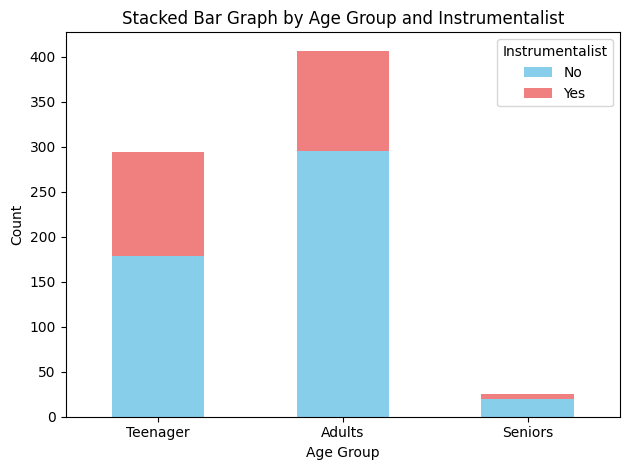

<Figure size 1000x600 with 0 Axes>

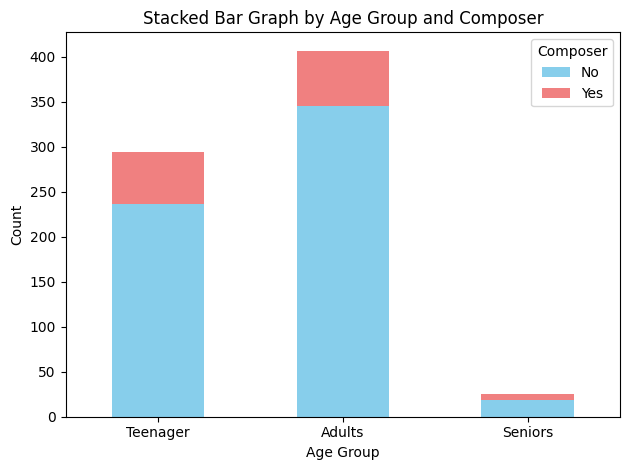

<Figure size 1000x600 with 0 Axes>

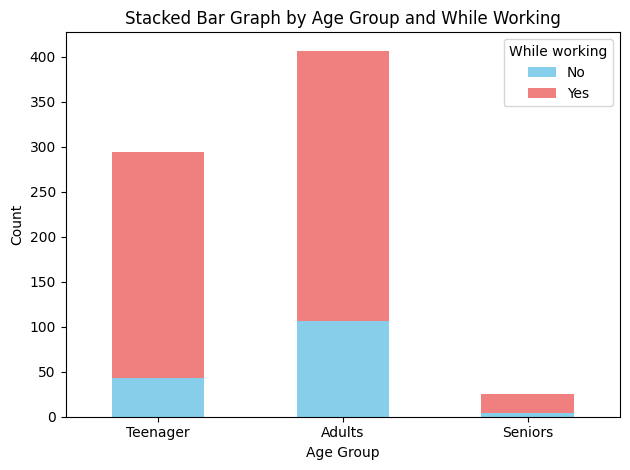

<Figure size 1000x600 with 0 Axes>

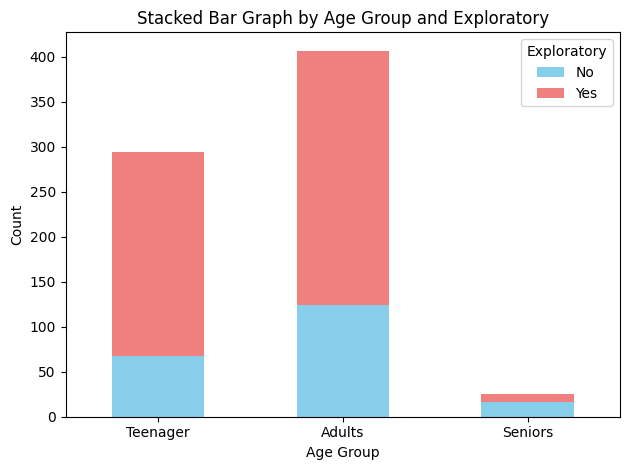

<Figure size 1000x600 with 0 Axes>

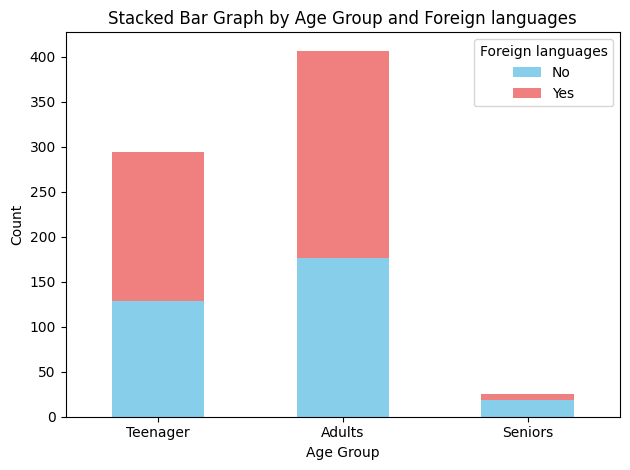

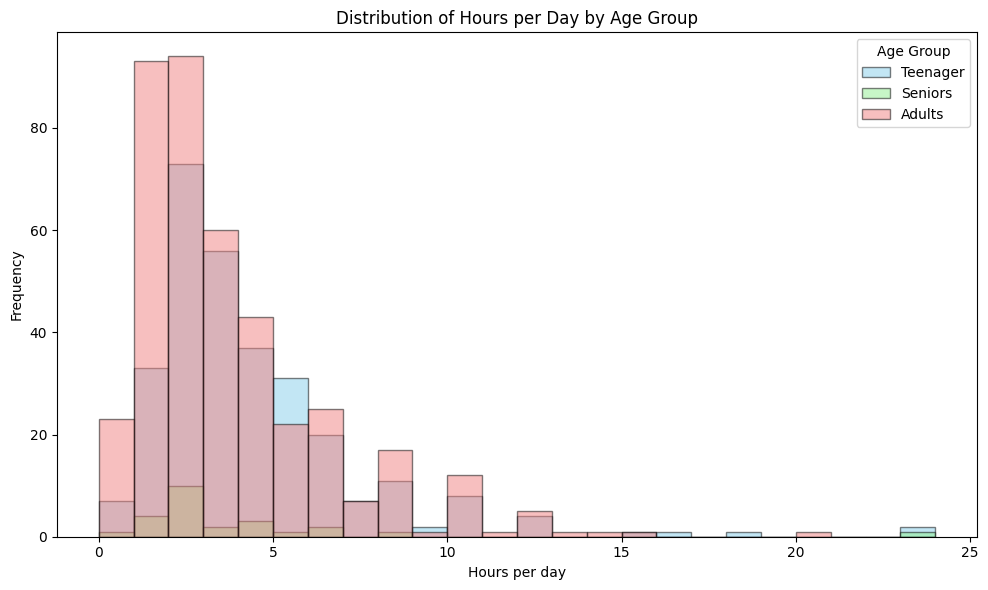

In [8]:
# Plot 1: Stacked Bar Graph by Age Group and Instrumentalist
plt.figure(figsize = (10, 6))
pivot_data1.plot(kind = 'bar', stacked = True, color = col)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Stacked Bar Graph by Age Group and Instrumentalist')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Plot 2: Stacked Bar Graph by Age Group and Composer
plt.figure(figsize = (10, 6))
pivot_data2.plot(kind = 'bar', stacked = True, color = col)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Stacked Bar Graph by Age Group and Composer')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Plot 3: Stacked Bar Graph by Age Group and While Working
plt.figure(figsize = (10, 6))
pivot_data3.plot(kind = 'bar', stacked = True, color = col)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Stacked Bar Graph by Age Group and While Working')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Plot 4: Stacked Bar Graph by Age Group and Exploratory
plt.figure(figsize = (10, 6))
pivot_data4.plot(kind = 'bar', stacked = True, color = col)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Stacked Bar Graph by Age Group and Exploratory')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Plot 5: Stacked Bar Graph by Age Group and Foreign languages
plt.figure(figsize = (10, 6))
pivot_data5.plot(kind = 'bar', stacked = True, color = col)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Stacked Bar Graph by Age Group and Foreign languages')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Plot 6: Histogram of Hours per Day by Age Group
plt.figure(figsize = (10, 6))
bins = range(0, 25)
for age_group in data['Age group'].unique():
    subset = data[data['Age group'] == age_group]
    plt.hist(subset['Hours per day'], bins = bins, alpha = 0.5, color = colors[age_group], edgecolor = 'black', linewidth = 1, label = age_group)

plt.xlabel('Hours per day')
plt.ylabel('Frequency')
plt.title('Distribution of Hours per Day by Age Group')
plt.legend(title = 'Age Group')
plt.tight_layout()
plt.show()

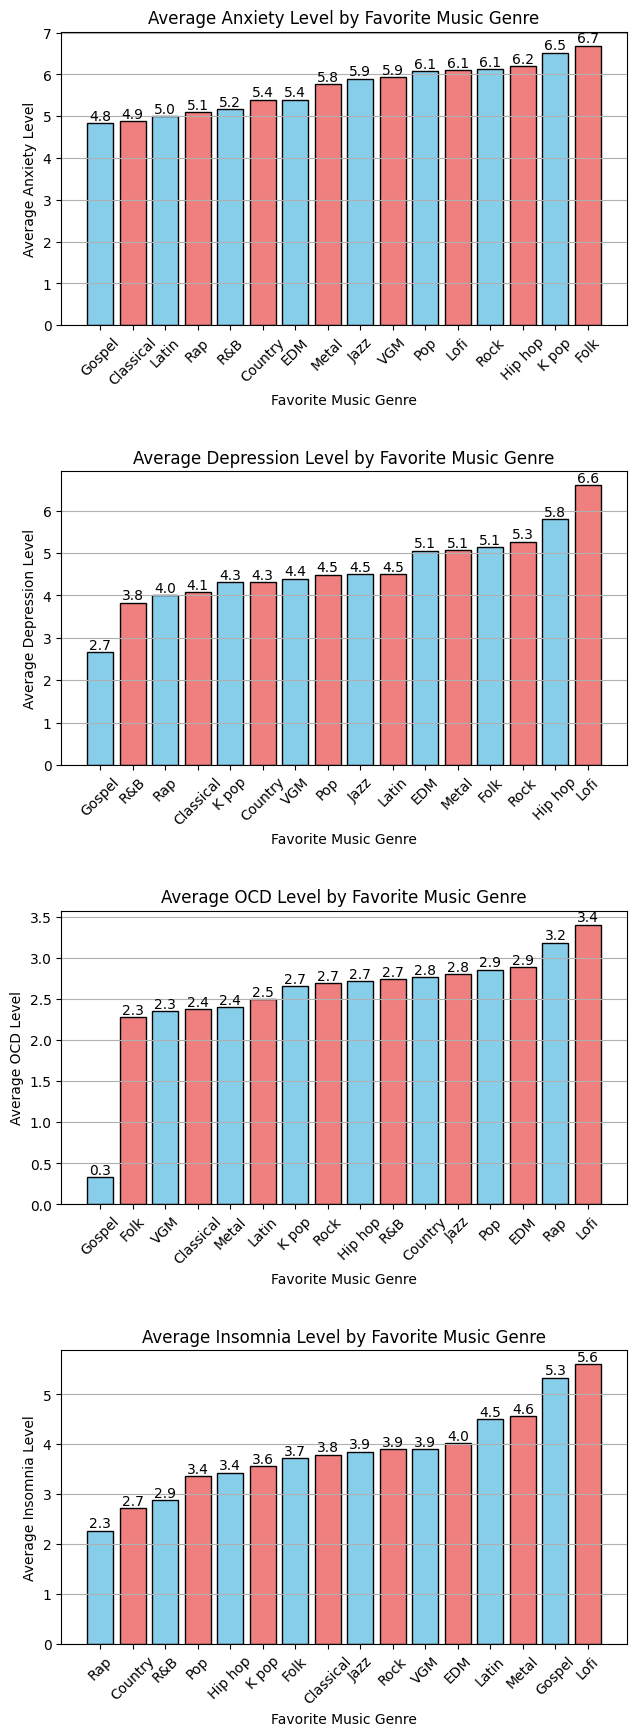

In [9]:
# Average of respective illnesses across the favorite genre of music
categories = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
colors = ['skyblue', 'lightcoral']
fig, axes = plt.subplots(4, 1, figsize = (7, 18))
axes = axes.flatten()

for i, category in enumerate(categories):
    genre_category = data.groupby('Fav genre')[category].mean().sort_values()
    
    # Colors for alternate bars
    # Alternate code for colors
    '''bar_colors = []
    for j in range(len(genre_category)):
        color_index = j % len(colors)
        bar_colors.append(colors[color_index])'''
    
    bar_colors = [colors[j % len(colors)] for j in range(len(genre_category))]
    ax = axes[i]
    bars = ax.bar(genre_category.index, genre_category.values, color = bar_colors, edgecolor = 'black')
    
    # Adding gridlines
    ax.grid(axis = 'y', linestyle = '-', alpha = 1)
    
    # Adding annotations
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.1f}', ha = 'center', va = 'bottom')
    
    # Customizing x-axis labels so that Video Game Music is written as VGM
    x_labels = [label if label != 'Video game music' else 'VGM' for label in genre_category.index]
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation = 45)
    
    # Setting labels and title for each subplot
    ax.set_xlabel('Favorite Music Genre')
    ax.set_ylabel(f'Average {category} Level')
    ax.set_title(f'Average {category} Level by Favorite Music Genre')

# Adjust layout to prevent overlap
plt.tight_layout(pad = 3.0, h_pad = 3.0)

# Show the plot
plt.show()

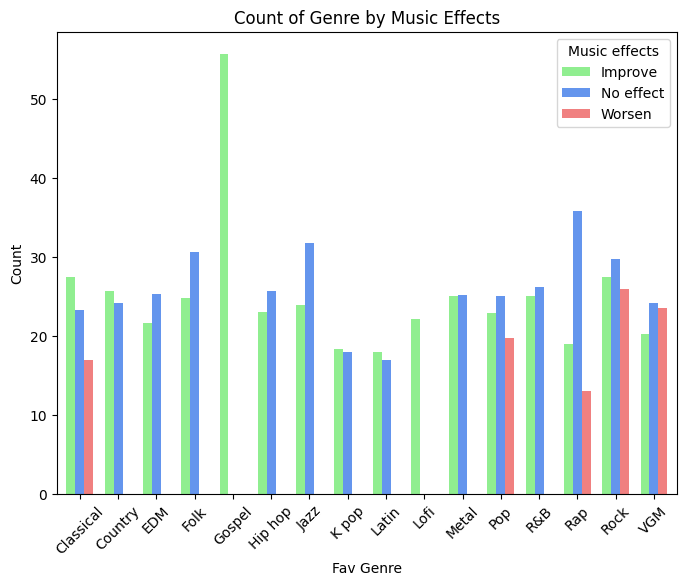

In [10]:
col = ['lightgreen', 'cornflowerblue', 'lightcoral']
pivot_data = data.pivot_table(values = 'Age', index = 'Fav genre', columns = 'Music effects', aggfunc = 'mean')
fig, ax = plt.figure(figsize = (8, 6)), plt.gca() 
pivot_data.plot(kind = 'bar', width = 0.7, ax = ax, color = col)

# Adding labels and title
plt.xlabel('Fav Genre')
plt.ylabel('Count')
plt.title('Count of Genre by Music Effects')
xticks = ax.get_xticks()
labels = [label.get_text() for label in ax.get_xticklabels()]
labels = ['VGM' if label == 'Video game music' else label for label in labels]
ax.set_xticklabels(labels, rotation = 45)
plt.show()